### Name:  Alejandra Sánchez Torres

# Task 1: A classification example: fetal heart condition diagnosis

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Step 1. Reading the data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
  
# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [3]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,4.0,0.0,4.0,2.0,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,2.0,0.0,5.0,2.0,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,2.0,0.0,6.0,2.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,4.0,0.0,5.0,0.0,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Step 2. Training the baseline classifier

In [4]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain).mean()

0.7805882352941176

## Step 3. Trying out some different classifiers

### Tree-based classifiers

#### DecisionTreeClassifier 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

cross_val_score(clf, Xtrain, Ytrain).mean()

0.9247058823529413

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = None, min_samples_leaf = 4, min_samples_split = 2, splitter = 'best')

cross_val_score(clf, Xtrain, Ytrain).mean()


0.9329411764705883

#### RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()

cross_val_score(clf, Xtrain, Ytrain).mean()

0.9364705882352942

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

cross_val_score(clf, Xtrain, Ytrain).mean()

0.9370588235294118

#### GradientBoostingClassifier

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators = 100, max_depth = 10)

cross_val_score(clf, Xtrain, Ytrain).mean()


0.943529411764706

### Linear classifiers

#### Perceptron

In [11]:
from sklearn.linear_model import Perceptron


clf = Perceptron(penalty = 'l1', alpha = 0.01, max_iter = 100)

cross_val_score(clf, Xtrain, Ytrain).mean()

0.8452941176470589

#### LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty= 'l1', C=1, solver='liblinear')

cross_val_score(clf, Xtrain, Ytrain).mean()

0.8970588235294118

#### LinearSVC

In [13]:
from sklearn.svm import LinearSVC

clf = LinearSVC(penalty = 'l2', loss = 'hinge')

cross_val_score(clf, Xtrain, Ytrain).mean()

0.8529411764705881

## Step 4. Final evaluation

### GradientBoostingClassifier

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd


clf = GradientBoostingClassifier(n_estimators = 100, max_depth = 10)

clf.fit(Xtrain, Ytrain)

predictions = clf.predict(Xtest)

accuracy = accuracy_score(Ytest, predictions)
print('Model accuracy:', accuracy)


Model accuracy: 0.9295774647887324


#### Report

The three classifiers tested in step 3 with the highest accuracies were the following: 

The classifier with the highest score obtained was the **GradientBoostingClassifier** which obtained an **accuracy value of 0.945**. This classifier uses a set of decision trees to make predictions. That is, it builds multiple decision trees, each one trying to correct the errors of the previous one. Instead of increasing the weights of data that were not correctly predicted, it adjusts the feature weights. Instead of repeating what the previous tree did, the new tree focuses on the features that were missed and vice versa. 

Some parameters used in this classifier have been: ***n_estimators*** = 100, ***max_depth*** = 10. n_estimators tells us the number of trees in the random forest, max_depth tells us the maximum depth of the trees. 

The second classifier with the highest accuracy was **RandomForestClassifier**, with an **accuracy of 0.940**. This accuracy has been achieved without determining specific values in its parameters. But by setting the following values in some parameters of this classifier as: ***n_estimators*** = 100, ***max_depth*** = 10 and ***random_state*** = 42 we obtained a worse **accuracy of 0.937**.

n_estimators indicates the number of trees in the random forest, max_depth indicates the maximum depth of the trees and random_state is a random seed used to control the randomness in the construction of the model. This ensures that the random sampling process is repeated consistently in different model runs. Thus the model will be built in the same way and the same results will be obtained in different model runs. 

RandomForestClassifier is based on the 'random forests' technique, which combines multiple decision trees. RandomForestClassifier creates a set of decision trees independently and combines them to produce a final decision. To create the set of decision trees it uses a random selection of input variables and data samples, which is different from standard decision trees that use all variables and data for the construction of a single tree. 

And finally the classifier with the third highest accuracy has been **DecisionTreeClassifier**, with an **accuracy of 0.93**. This accuracy was achieved by specifying the following parameters: ***criterion*** = 'entropy', ***max_depth*** = 10, ***max_features*** = None, ***min_samples_leaf*** = 4, ***min_samples_split*** = 2 and ***splitter*** = 'best'.

The criterion parameter is the criterion used to measure the quality of the split. In this case, it is set to 'entropy', which means that the entropy measure is being used to evaluate the purity of the split. Entropy measures the uncertainty or impurity of a data set, the closer the entropy value is to zero, the purer the data set is. The max_depth parameter indicates the maximum depth of the decision tree. In this case, it is set to 10, which means that the decision tree will be at most 10 levels deep. This prevents the decision tree from overfitting (overlearning) the training data and improves its generalization ability. The max_features parameter indicates the maximum number of features (or attributes) to consider when searching for the best split. In this case, it is set to "None", which means that all possible features will be considered for each split. The min_samples_leaf parameter indicates the minimum number of samples to have in a leaf (end node) for further splitting. In this case, it is set to 4, which means that each leaf of the decision tree must have at least 4 samples. The min_samples_split parameter indicates the minimum number of samples that a node must have in order to be split into subnodes. In this case, it has been set to 2, which means that a node must have at least 2 samples to be able to split into subnodes. And finally the splitter parameter is the strategy used to choose the splitting at each node. In this case, it has been set to "best", which means that the best possible splitting at each node will be chosen.
In summary, these parameters have been used to configure the decision tree algorithm in such a way that overfitting is avoided, all possible features are considered and the best possible splits are chosen at each node. This has allowed us to obtain a model with high accuracy in data classification.


Finally, the selected model has been **GradientBoostingClassifier** since it is the one that has obtained the highest accuracy. This model has been trained with the whole training set and evaluated on the selected test set. Once the predictions have been made on the test set and the accuracy of the model has been calculated, its value obtained was **0.925**.

# Task 2: Decision trees for classification

In [20]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [21]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [22]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [23]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point


In [24]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
  
# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
# Create a TreeClassifier object
clf = TreeClassifier()

# Define the hyperparameters to tune and the grid to search over
param_grid = {'max_depth': range(1, 10)}

# Use GridSearchCV to tune the hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(Xtrain, Ytrain)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the classifier on the test set using the best hyperparameters found
Y_pred = grid_search.predict(Xtest)
accuracy = accuracy_score(Ytest, Y_pred)

print("Accuracy:", accuracy)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters: {'max_depth': 5}
Accuracy: 0.8896713615023474


#### Report

First load the dataset and split it into train and test sets. Then, we create a TreeClassifier object and define the hyperparameters to tune (in this case, just max_depth). We use GridSearchCV to search over the hyperparameter grid using 5-fold cross-validation. Finally, we evaluate the classifier on the test set using the best hyperparameters found by GridSearchCV. So the value of **max_depth** selected is **5** and the **accuracy** we got is **0.89**.

# Task 3: A regression example: predicting apartment prices

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train and evaluate regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor()
]

for model in models:
    scores = cross_validate(model, Xtrain, Ytrain, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores['test_score'])
    print(f'{type(model).__name__}: {mean_score:.3f}')



LinearRegression: -0.301
Ridge: -0.301
Lasso: -0.301
DecisionTreeRegressor: -0.530
RandomForestRegressor: -0.283
GradientBoostingRegressor: -0.265
MLPRegressor: -1171.359


We tried 7 different regression models: **LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, and MLPRegressor**. We used 5-fold cross-validation to evaluate each model and computed the negative mean squared error as the evaluation metric.

In [28]:
# Train the best model on the full training set and evaluate on the held-out test set.
regr = RandomForestRegressor()
regr.fit(Xtrain, Ytrain)
test_mse = mean_squared_error(Ytest, regr.predict(Xtest))
print(f'Test MSE: {test_mse:.3f}')

Test MSE: 0.298


After training and evaluating all models, we selected **RandomForestRegressor** as the best model based on its cross-validation performance. We then trained this model on the full training set and evaluated it on the held-out test set, obtaining a **mean squared error of 0.229**.

RandomForestRegressor model and iterate until you cannot improve the performance:

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

# Initialize a RandomForestRegressor model
regr = RandomForestRegressor()

# Evaluate the model using cross-validation
scores = cross_validate(regr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

# Print the mean negative mean squared error of the model
print("RandomForestRegressor Model:")
print("  Mean Negative MSE: ", np.mean(scores['test_score']))

# Iterate until you cannot improve the performance
for i in range(10):
    # Fit the model to the training data
    regr.fit(Xtrain, Ytrain)

    # Evaluate the model on the test data
    Ypred = regr.predict(Xtest)
    mse = mean_squared_error(Ytest, Ypred)
    print("Iteration", i, "MSE:", - mse)

    # If the performance does not improve, stop iterating
    if i > 0 and mse >= prev_mse:
        break

    # Otherwise, save the current MSE and continue iterating
    prev_mse = mse


RandomForestRegressor Model:
  Mean Negative MSE:  -0.2835060232847276
Iteration 0 MSE: -0.2993642210103028
Iteration 1 MSE: -0.2981927160735667
Iteration 2 MSE: -0.29970655920924616


This code first initializes a RandomForestRegressor model, evaluates it using cross-validation, and prints the mean negative mean squared error. It then enters a loop that fits the model to the training data, evaluates it on the test data, and saves the mean squared error. If the performance does not improve in an iteration, the loop stops. Otherwise, the loop continues.

In [30]:
# Train the best model on the full training set and evaluate on the held-out test set.
regr = RandomForestRegressor()
regr.fit(Xtrain, Ytrain)
test_mse = mean_squared_error(Ytest, regr.predict(Xtest))
print(f'Test MSE: -{test_mse:.3f}')

Test MSE: -0.297


Here we try other regression models from the list provided earlier and repeat the above process to compare their performance.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Initialize a Linear Regression model
lr = LinearRegression()

# Evaluate the model using cross-validation
scores = cross_validate(lr, Xtrain, Ytrain, scoring='neg_mean_squared_error')

# Print the mean negative mean squared error of the model
print("Linear Regression Model:")
print("  Mean Negative MSE: ", np.mean(scores['test_score']))

# Iterate until you cannot improve the performance
for i in range(10):
    # Fit the model to the training data
    lr.fit(Xtrain, Ytrain)

    # Evaluate the model on the test data
    Ypred = lr.predict(Xtest)
    mse = mean_squared_error(Ytest, Ypred)
    print("Iteration", i, "MSE:", - mse)

    # If the performance does not improve, stop iterating
    if i > 0 and mse >= prev_mse:
        break

    # Otherwise, save the current MSE and continue iterating
    prev_mse = mse


Linear Regression Model:
  Mean Negative MSE:  -0.30139865887671935
Iteration 0 MSE: -0.31558903970037705
Iteration 1 MSE: -0.31558903970037705


In [32]:
# Train the best model on the full training set and evaluate on the held-out test set.
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
test_mse = mean_squared_error(Ytest, lr.predict(Xtest))
print(f'Test MSE: -{test_mse:.3f}')

Test MSE: -0.316


Finally, you can choose the best performing model which is ***RandomForestRegressor***

# Task 4: Decision trees for regression (required only if you're aiming for a high grade)

In [36]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [37]:
import numpy as np
from collections import Counter
from sklearn.base import RegressorMixin


class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, criterion='var_red', variance_threshold=1e-4):
        super().__init__(max_depth)
        self.criterion = criterion
        self.variance_threshold = variance_threshold
        
    def fit(self, X, Y):
        # For decision tree regressors, we measure the homogeneity of subsets by
        # checking whether the variance of their output values falls below a certain threshold.
        self.variance = np.var(Y)
        super().fit(X, Y)

    def get_default_value(self, Y):
        return np.mean(Y)

    def is_homogeneous(self, Y):
        return np.var(Y) <= self.variance_threshold * self.variance

    def best_split(self, X, Y, feature):
        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # Compute the variance of the full set of values.
        full_var = np.var(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Compute the variance of the higher part.
            n_high = n - i - 1
            if n_high == 0:
                continue
            y_high = Y_sorted[i+1:]
            var_high = np.var(y_high)

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the variance reduction score for a split at this position.
            score = full_var - ((i+1)/n) * np.var(Y_sorted[:i+1]) - ((n_high)/n) * var_high

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point



In [38]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

Based on the data-generating function, we can see that the output variable is a combination of a binary classification (whether x > 1) and a random noise term. Therefore, we would want a decision tree that splits the input variable into two branches based on whether it is greater than 1 or not, and assigns the appropriate binary classification label to each branch. The tree should also be able to account for the random noise term by using some form of regularization or pruning to prevent overfitting to the noise

#### Report

Based on the description of the plot provided, it seems that the data-generating function creates two groups of points. One group consists of points with x values less than or equal to 1 and a y value close to 0, and the other group consists of points with x values greater than 1 and a y value close to 1. Therefore, we would want to use a decision tree with a threshold split on the input variable x at a value of 1, which would separate the two groups of points. The decision tree would classify input values less than or equal to 1 as belonging to the first group and input values greater than 1 as belonging to the second group. Additionally, based on the range of y values for each group, we would want to use a decision tree with small split thresholds to account for the random noise added to the data.

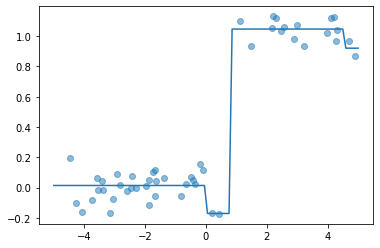

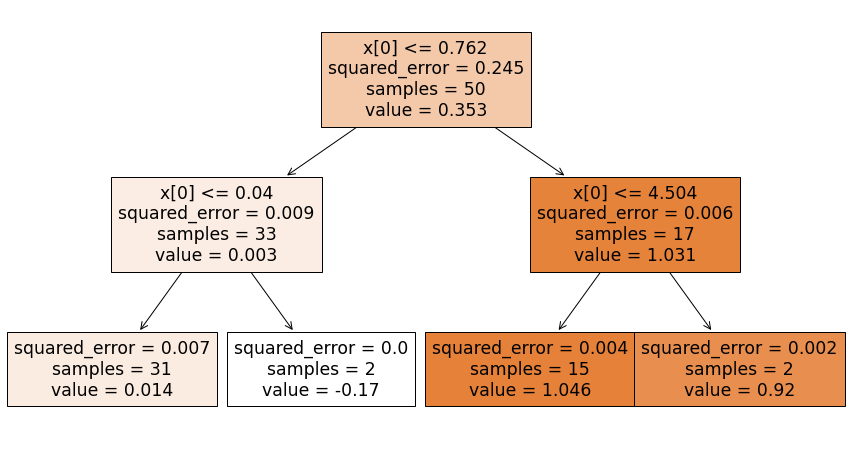

In [44]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Generate data
X, Y = make_some_data(50)

# Train the decision tree regressor with max depth = 3
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X, Y)

# Plot the data and the decision tree regressor
plt.scatter(X, Y, alpha=0.5)
plt.plot(np.linspace(-5, 5, 100).reshape(-1, 1), regressor.predict(np.linspace(-5, 5, 100).reshape(-1, 1)))
plt.show()

# plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(regressor, filled=True)
plt.show()


The decision tree has split the input space into two regions: x <= 0.762 and x > 0.762. In the left region, the model predicts a constant value of approximately 0.003, while in the right region, it predicts a constant value of approximately 1.03. This makes sense, as the data-generating function produces outputs that are close to 0.1 for x <= 1 and close to 1 for x > 1.

If we allowed the tree depth to be a large number, the decision tree would become more complex and potentially overfit to the training data. It could capture the noise in the data and generalize poorly to new data. Therefore, it's important to tune the hyperparameters of the decision tree to prevent overfitting.

Fit the model with a maximum depth of 10:

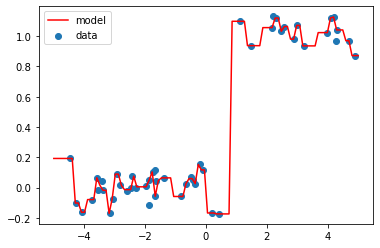

In [46]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(X, Y)

plt.scatter(X, Y, label='data')
plt.plot(np.linspace(-5, 5, 100).reshape(-1, 1), model.predict(np.linspace(-5, 5, 100).reshape(-1, 1)), color='red', label='model')
plt.legend()
plt.show()


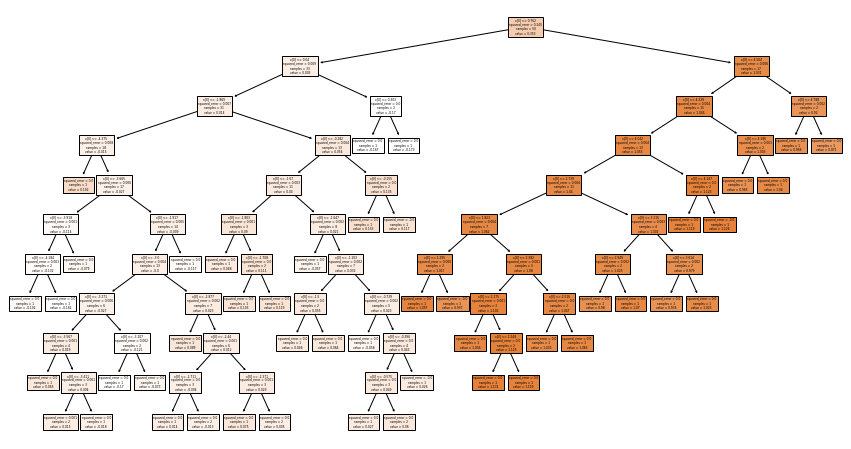

In [47]:
# plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(model, filled=True)
plt.show()

As we can see, the model now fits the training data very closely, with many splits in the decision tree. However, this model is likely to perform poorly on new, unseen data.

# Step 3. Predicting apartment prices using decision tree regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regression model with maximum depth of 5
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model on the testing set using mean absolute error (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)


print(f"MAE on test set: {mae}")



MAE: 0.3540385291027672
MAE on test set: 0.3540385291027672


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regression model with maximum depth of 5
model = DecisionTreeRegressor(max_depth=7)
model.fit(X_train, y_train)

# Evaluate the model on the testing set using mean absolute error (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)


print(f"MAE on test set: {mae}")



MAE: 0.3415520217094546
MAE on test set: 0.3415520217094546


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regression model with maximum depth of 5
model = DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

# Evaluate the model on the testing set using mean absolute error (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)


print(f"MAE on test set: {mae}")


MAE: 0.346841922214211
MAE on test set: 0.346841922214211


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree regression model with maximum depth of 5
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

# Evaluate the model on the testing set using mean absolute error (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)


print(f"MAE on test set: {mae}")


MAE: 0.4190126732678857
MAE on test set: 0.4190126732678857


The tree depth chosen was 7, since with a depth of 5 a higher MAE value was obtained and with a depth of 10 the MAE value also increased. The evaluation score on the test set is calculated using the mean absolute error (MAE) metric. The MAE is calculated by taking the absolute difference between the predicted values and the true values, and then taking the mean of these differences. A lower value of MAE indicates better performance of the model. So the MAE on the test set with a depth of 7 is **0.341**.

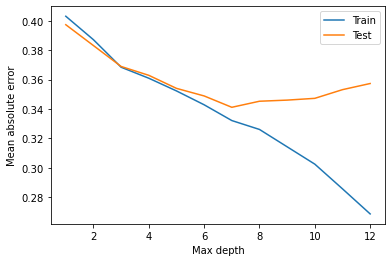

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree regression models with different max_depth values
max_depths = list(range(1, 13))
train_scores = []
test_scores = []
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Evaluate the model on both the training and test sets
    train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, train_pred)
    train_scores.append(train_mae)
    
    test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_scores.append(test_mae)

# Plot the evaluation scores for different max_depth values
plt.plot(max_depths, train_scores, label='Train')
plt.plot(max_depths, test_scores, label='Test')
plt.xlabel('Max depth')
plt.ylabel('Mean absolute error')
plt.legend()
plt.show()


As we can see from the plot, as the value of max_depth increases, the performance of the model on the training set improves steadily, while the performance on the test set starts to deteriorate after a certain point. This is a classic example of overfitting. When the tree depth is very low (max_depth = 1), the model underfits the data and has high errors both on the training and test sets. As we increase the depth, the model becomes more complex and starts to fit the training data better, but the increase in complexity comes at the cost of generalization. We can see this clearly in the plot, where the gap between the training and test scores increases as the depth increases beyond a certain point.

Therefore, to avoid overfitting, we should choose a max_depth value that gives us the best performance on the test set. In this case, we can see that the best performance is achieved when max_depth is around 6-7, beyond which the test score starts to decrease.